In [1]:
import quandl
import re
import googlemaps
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
plt.style.use('ggplot')

In [2]:
with open('quandl_key.txt', 'r') as f:
    q_key = f.read()

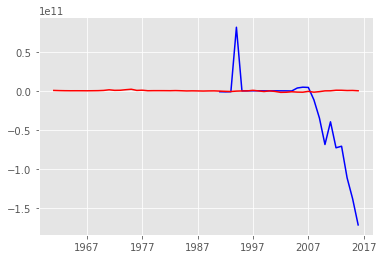

In [3]:
Armenia_trade = quandl.get("WWDI/ARM_NY_TTF_GNFS_KN",authtoken=q_key)
Luxembourg_trade = quandl.get("WWDI/LUX_NY_TTF_GNFS_KN", authtoken=q_key)
plt.plot(Armenia_trade, 'b')
plt.plot(Luxembourg_trade, 'r')
plt.show()

In [4]:
sort_list = []
for i in range(len(Armenia_trade["Value"])):
    sort_list.append(Armenia_trade['Value'][i])
    sort_list.sort()
max_2nd = sort_list[-2]

In [5]:
max_2nd

4624303108.7461996

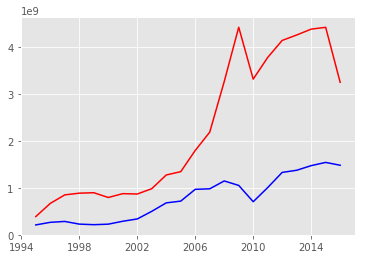

In [6]:
A_exports = quandl.get('WWDI/ARM_TX_VAL_MRCH_CD_WT', authtoken=q_key)
A_imports = quandl.get('WWDI/ARM_TM_VAL_MRCH_CD_WT', authtoken=q_key)
plt.plot(A_exports, 'b')
plt.plot(A_imports, 'r')
plt.show()

In [7]:
data = quandl.get(['WIKI/ATVI','SSE/N9B', 'TSE/9697'], authtoken=q_key, 
                  trim_start="2000-1-1", trim_end="2016-12-31", collapse = 'dayly')
data1=data[['WIKI/ATVI - Close','SSE/N9B - Last','TSE/9697 - Close']]
data1.corr()

,WIKI/ATVI - Close,SSE/N9B - Last,TSE/9697 - Close
WIKI/ATVI - Close,1.000000,0.817310,0.724184
SSE/N9B - Last,0.817310,1.000000,0.452613
TSE/9697 - Close,0.724184,0.452613,1.000000


In [8]:
with open('google_key.txt','r') as f:
    g_key = f.read()
gmaps = googlemaps.Client(key=g_key)

In [10]:
now=datetime.now()
loc1 = 'New York,USA'
locations = ['Los Angeles,USA','San Francisco,USA','Las Vegas,USA','Chicago,USA','Memphis,USA','Detroit,USA','Nashvile,USA',
             'Boston,USA','Berkeley,USA','Kansas city,USA']
for loc2 in tqdm(locations):
    directions=gmaps.directions(loc1,loc2, departure_time=now)
    for i in directions:
        legs=i["legs"]
        for leg in legs:
            dist =leg["distance"]
            x = str(dist["text"])
            y = re.sub(',','',x)
            z = re.findall('[0-9]+',y)
            km = float(z[0])*1.60934
            print "The distance beetween "+loc1+" and "+loc2+" is "+str(km)+" km"+" or "+dist["text"]


  0%|                                                   | 0/10 [00:00<?, ?it/s]


The distance beetween New York,USA and Los Angeles,USA is 4493.27728 km or 2,792 mi



 10%|████▎                                      | 1/10 [00:03<00:33,  3.67s/it]

The distance beetween New York,USA and San Francisco,USA is 4678.35138 km or 2,907 mi



 20%|████████▌                                  | 2/10 [00:07<00:29,  3.72s/it]

The distance beetween New York,USA and Las Vegas,USA is 4061.97416 km or 2,524 mi



 30%|████████████▉                              | 3/10 [00:11<00:26,  3.78s/it]

The distance beetween New York,USA and Chicago,USA is 1272.98794 km or 791 mi



 40%|█████████████████▏                         | 4/10 [00:14<00:21,  3.61s/it]

The distance beetween New York,USA and Memphis,USA is 1765.44598 km or 1,097 mi



 50%|█████████████████████▌                     | 5/10 [00:18<00:17,  3.59s/it]

The distance beetween New York,USA and Detroit,USA is 992.96278 km or 617 mi



 60%|█████████████████████████▊                 | 6/10 [00:21<00:13,  3.49s/it]

The distance beetween New York,USA and Nashvile,USA is 1425.87524 km or 886 mi



 70%|██████████████████████████████             | 7/10 [00:24<00:09,  3.23s/it]

The distance beetween New York,USA and Boston,USA is 344.39876 km or 214 mi



 80%|██████████████████████████████████▍        | 8/10 [00:25<00:05,  2.71s/it]

The distance beetween New York,USA and Berkeley,USA is 4663.86732 km or 2,898 mi



 90%|██████████████████████████████████████▋    | 9/10 [00:28<00:02,  2.89s/it]

The distance beetween New York,USA and Kansas city,USA is 1916.72394 km or 1,191 mi



100%|██████████████████████████████████████████| 10/10 [00:32<00:00,  3.12s/it]
